# **Análise de Cross-Sell no segmento de QSR pelo Algoritmo Apriori**

O trabalho será construído utilizando uma base anonimizada fornecida por rede do QSR brasileiro (*Quick Service Restaurants*) para buscar identificar relações e interações entre os diferentes itens do menu, visando aumentar vendas por meio da maximização dos itens por transação.

Inicialmente, importaremos as bibliotecas e as bases de dados que serão utilizadas no trabalho para fazer a análise Descritiva:

In [1]:
!pip install mlxtend

In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd  
import numpy as np

Após as importações das  bibliotecas, importaremos a base recebida em CSV e o Dicionário de Dados:

In [3]:
transacoes = pd.read_csv('Transacoes.csv', delimiter = ';')

In [4]:
transacoes.head()

,Admin,Regiao,Cb01_Sand_Beb_Acomp_Reg,Cb01_Sand_Beb_Acomp_Cup,Sand01_Reg,Sand01_Cup,Cb16_Sand_Beb_Acomp_Reg,Cb16_Sand_Beb_Acomp_Cup,Sand16_Reg,Sand16_Cup,...,Acomp03_Reg,Acomp03_Cup,Acomp02_Reg,Acomp02_Cup,Acomp04_Reg,Acomp04_Cup,2Sand_Beb_Acomp_Reg,2Sand_Beb_Acomp_Cup,Qtd_transacoes,VL_Venda
0,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1373,"19934,65147"
1,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,852,"16106,65744"
2,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,240,"5135,182905"
3,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,142,"3183,077909"
4,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,40,"1035,245162"


Inicialmente vamos avaliar o perfil dos dois Dataframes e os tipos de dados que foram importados, para verificar se alguma transformação é necessária:

In [5]:
transacoes.shape

(952560, 109)

In [6]:
transacoes.dtypes

Admin                      object
Regiao                     object
Cb01_Sand_Beb_Acomp_Reg     int64
Cb01_Sand_Beb_Acomp_Cup     int64
Sand01_Reg                  int64
                            ...  
Acomp04_Cup                 int64
2Sand_Beb_Acomp_Reg         int64
2Sand_Beb_Acomp_Cup         int64
Qtd_transacoes              int64
VL_Venda                   object
Length: 109, dtype: object

A coluna "VL_Venda" foi importada como Objeto, quando deveria ter sido importada como Float. Para resolver isso, faremos a transformação dos dados:

In [7]:
transacoes['VL_Venda'] = transacoes['VL_Venda'].apply (lambda x: x.replace(',', '.'))

In [8]:
transacoes['VL_Venda'] = transacoes['VL_Venda'].astype(float)

In [9]:
transacoes.dtypes

Admin                       object
Regiao                      object
Cb01_Sand_Beb_Acomp_Reg      int64
Cb01_Sand_Beb_Acomp_Cup      int64
Sand01_Reg                   int64
                            ...   
Acomp04_Cup                  int64
2Sand_Beb_Acomp_Reg          int64
2Sand_Beb_Acomp_Cup          int64
Qtd_transacoes               int64
VL_Venda                   float64
Length: 109, dtype: object

## Análise Exploratória

Para iniciar a análise exploratória do Dataframe tratado e com as colunas melhor identificadas após o cruzamento com o Dicionário de dados, vamos apurar a quantidade de transações apontadas no Dataframe, o valor de venda total e o Ticket Médio, que é um indicador relevante para o segmento:

In [10]:
TT_Transacoes = transacoes['Qtd_transacoes'].sum()
print (TT_Transacoes)

5671218


In [11]:
TT_Venda = transacoes['VL_Venda'].sum()
print (TT_Venda)

162127973.99246562


In [12]:
Ticket_Medio = TT_Venda / TT_Transacoes
print (Ticket_Medio)

28.58785784508118


O dataframe informado conta com 5,67MM transações com um valor total de 162,1MM de reais, totalizando um Ticket Médio de R$ 28,59 no período analisado.

Podemos apurar as diferenças nesses indicadores pelas colunas "Admin" e "Região" para identificar diferenças regionais e de administração dos restaurantes:

In [13]:
table = pd.pivot_table(transacoes, index = ['Regiao','Admin'], values = ['Qtd_transacoes', 'VL_Venda'], aggfunc = np.sum)

In [14]:
table

Qtd_transacoes      VL_Venda
Regiao  Admin                                   
N+NE+CO Franqueado          559396  1.497248e+07
        Proprio             804259  2.035204e+07
SE      Franqueado         1413760  4.081343e+07
        Proprio            1771406  5.457126e+07
SUL     Franqueado          489793  1.353845e+07
        Proprio             632604  1.788031e+07

In [15]:
table['Ticket_Medio'] = table['VL_Venda']/table['Qtd_transacoes']

In [16]:
table

Qtd_transacoes      VL_Venda  Ticket_Medio
Regiao  Admin                                                 
N+NE+CO Franqueado          559396  1.497248e+07     26.765441
        Proprio             804259  2.035204e+07     25.305331
SE      Franqueado         1413760  4.081343e+07     28.868713
        Proprio            1771406  5.457126e+07     30.806750
SUL     Franqueado          489793  1.353845e+07     27.641171
        Proprio             632604  1.788031e+07     28.264614

A tabela acima indica que o Ticket Médio dos franqueados é maior na Região N+NE+CO, mas menor nas regiões SE e Sul. Também podemos observar como a região SE tem maior peso no negócio. Podemos visualizar o resultado gráfico abaixo:

In [17]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Qtd_transacoes'>

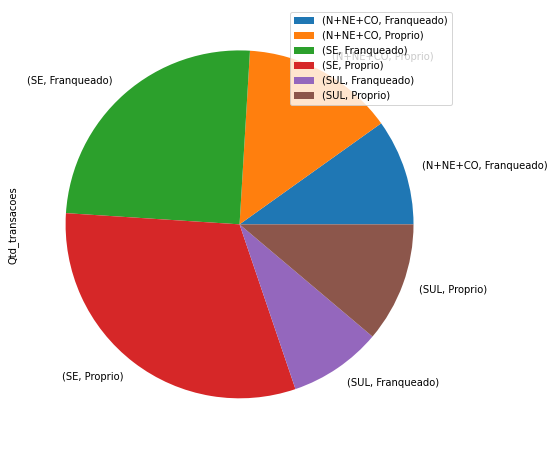

In [18]:
table.plot.pie(y='Qtd_transacoes', figsize=(20,8))

Para a análise exploratória, vamos criar uma nova coluna com o indicador de Ticket Médio para verificarmos o perfil das transações do dataframe:

In [19]:
transacoes['Ticket_Medio'] = transacoes['VL_Venda']/transacoes['Qtd_transacoes']

In [20]:
transacoes.head()

,Admin,Regiao,Cb01_Sand_Beb_Acomp_Reg,Cb01_Sand_Beb_Acomp_Cup,Sand01_Reg,Sand01_Cup,Cb16_Sand_Beb_Acomp_Reg,Cb16_Sand_Beb_Acomp_Cup,Sand16_Reg,Sand16_Cup,...,Acomp03_Cup,Acomp02_Reg,Acomp02_Cup,Acomp04_Reg,Acomp04_Cup,2Sand_Beb_Acomp_Reg,2Sand_Beb_Acomp_Cup,Qtd_transacoes,VL_Venda,Ticket_Medio
0,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1373,19934.651470,14.519047
1,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,852,16106.657440,18.904528
2,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,240,5135.182905,21.396595
3,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,142,3183.077909,22.416042
4,Franqueado,N+NE+CO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,40,1035.245162,25.881129


Agora, vamos criar uma variável para armazenar as composições das transações e entender quais os produtos mais relevantes do mix e o perfil das transações:

Agora podemos aplicar o método FOR para apurar a importância de cada um dos itens do mix no total de transações e cada Ticket Médio do grupo de transações que contém cada item do Pmix:

In [21]:
cols = list(transacoes.columns)

In [22]:
print (cols)

['Admin', 'Regiao', 'Cb01_Sand_Beb_Acomp_Reg', 'Cb01_Sand_Beb_Acomp_Cup', 'Sand01_Reg', 'Sand01_Cup', 'Cb16_Sand_Beb_Acomp_Reg', 'Cb16_Sand_Beb_Acomp_Cup', 'Sand16_Reg', 'Sand16_Cup', 'Cb04_Sand_Beb_Acomp_Reg', 'Cb04_Sand_Beb_Acomp_Cup', 'Sand04_Reg', 'Sand04_Cup', 'Cb09_Sand_Beb_Acomp_Reg', 'Cb09_Sand_Beb_Acomp_Cup', 'Sand09_Reg', 'Sand09_Cup', 'Cb07_Sand_Beb_Acomp_Reg', 'Cb07_Sand_Beb_Acomp_Cup', 'Sand07_Reg', 'Sand07_Cup', 'Cb18_Sand_Beb_Acomp_Reg', 'Cb18_Sand_Beb_Acomp_Cup', 'Sand18_Reg', 'Sand18_Cup', 'Cb10_Sand_Beb_Acomp_Reg', 'Cb10_Sand_Beb_Acomp_Cup', 'Sand10_Reg', 'Sand10_Cup', 'Cb06_Sand_Beb_Acomp_Reg', 'Cb06_Sand_Beb_Acomp_Cup', 'Sand06_Reg', 'Sand06_Cup', 'CbA01_Sand_Beb_Acomp_Reg', 'CbA01_Sand_Beb_Acomp_Cup', 'Acomp01_Reg', 'Acomp01_Cup', 'Cb05_Sand_Beb_Acomp_Reg', 'Cb05_Sand_Beb_Acomp_Cup', 'Sand05_Reg', 'Sand05_Cup', 'Cb11_Sand_Beb_Acomp_Reg', 'Cb11_Sand_Beb_Acomp_Cup', 'Sand11_Reg', 'Sand11_Cup', 'Cb03_Sand_Beb_Acomp_Reg', 'Cb03_Sand_Beb_Acomp_Cup', 'Sand03_Reg', 'Sand0

In [23]:
cols.pop()
cols.pop()
cols.pop()
print (cols)

['Admin', 'Regiao', 'Cb01_Sand_Beb_Acomp_Reg', 'Cb01_Sand_Beb_Acomp_Cup', 'Sand01_Reg', 'Sand01_Cup', 'Cb16_Sand_Beb_Acomp_Reg', 'Cb16_Sand_Beb_Acomp_Cup', 'Sand16_Reg', 'Sand16_Cup', 'Cb04_Sand_Beb_Acomp_Reg', 'Cb04_Sand_Beb_Acomp_Cup', 'Sand04_Reg', 'Sand04_Cup', 'Cb09_Sand_Beb_Acomp_Reg', 'Cb09_Sand_Beb_Acomp_Cup', 'Sand09_Reg', 'Sand09_Cup', 'Cb07_Sand_Beb_Acomp_Reg', 'Cb07_Sand_Beb_Acomp_Cup', 'Sand07_Reg', 'Sand07_Cup', 'Cb18_Sand_Beb_Acomp_Reg', 'Cb18_Sand_Beb_Acomp_Cup', 'Sand18_Reg', 'Sand18_Cup', 'Cb10_Sand_Beb_Acomp_Reg', 'Cb10_Sand_Beb_Acomp_Cup', 'Sand10_Reg', 'Sand10_Cup', 'Cb06_Sand_Beb_Acomp_Reg', 'Cb06_Sand_Beb_Acomp_Cup', 'Sand06_Reg', 'Sand06_Cup', 'CbA01_Sand_Beb_Acomp_Reg', 'CbA01_Sand_Beb_Acomp_Cup', 'Acomp01_Reg', 'Acomp01_Cup', 'Cb05_Sand_Beb_Acomp_Reg', 'Cb05_Sand_Beb_Acomp_Cup', 'Sand05_Reg', 'Sand05_Cup', 'Cb11_Sand_Beb_Acomp_Reg', 'Cb11_Sand_Beb_Acomp_Cup', 'Sand11_Reg', 'Sand11_Cup', 'Cb03_Sand_Beb_Acomp_Reg', 'Cb03_Sand_Beb_Acomp_Cup', 'Sand03_Reg', 'Sand0

In [24]:
del cols[0]
del cols[0]
print (cols)

['Cb01_Sand_Beb_Acomp_Reg', 'Cb01_Sand_Beb_Acomp_Cup', 'Sand01_Reg', 'Sand01_Cup', 'Cb16_Sand_Beb_Acomp_Reg', 'Cb16_Sand_Beb_Acomp_Cup', 'Sand16_Reg', 'Sand16_Cup', 'Cb04_Sand_Beb_Acomp_Reg', 'Cb04_Sand_Beb_Acomp_Cup', 'Sand04_Reg', 'Sand04_Cup', 'Cb09_Sand_Beb_Acomp_Reg', 'Cb09_Sand_Beb_Acomp_Cup', 'Sand09_Reg', 'Sand09_Cup', 'Cb07_Sand_Beb_Acomp_Reg', 'Cb07_Sand_Beb_Acomp_Cup', 'Sand07_Reg', 'Sand07_Cup', 'Cb18_Sand_Beb_Acomp_Reg', 'Cb18_Sand_Beb_Acomp_Cup', 'Sand18_Reg', 'Sand18_Cup', 'Cb10_Sand_Beb_Acomp_Reg', 'Cb10_Sand_Beb_Acomp_Cup', 'Sand10_Reg', 'Sand10_Cup', 'Cb06_Sand_Beb_Acomp_Reg', 'Cb06_Sand_Beb_Acomp_Cup', 'Sand06_Reg', 'Sand06_Cup', 'CbA01_Sand_Beb_Acomp_Reg', 'CbA01_Sand_Beb_Acomp_Cup', 'Acomp01_Reg', 'Acomp01_Cup', 'Cb05_Sand_Beb_Acomp_Reg', 'Cb05_Sand_Beb_Acomp_Cup', 'Sand05_Reg', 'Sand05_Cup', 'Cb11_Sand_Beb_Acomp_Reg', 'Cb11_Sand_Beb_Acomp_Cup', 'Sand11_Reg', 'Sand11_Cup', 'Cb03_Sand_Beb_Acomp_Reg', 'Cb03_Sand_Beb_Acomp_Cup', 'Sand03_Reg', 'Sand03_Cup', 'Cb02_Sand_

In [25]:
mix_prod_transacoes = []
for col in cols:
    mix_prod_transacoes.append(transacoes.loc[transacoes[col] != 0, 'Qtd_transacoes'].sum()/transacoes['Qtd_transacoes'].sum())
    
print (mix_prod_transacoes)

[0.05215017303161332, 0.0589637005666155, 0.0034840840186358556, 0.020161277524510607, 0.020415191234052367, 0.014660695462597276, 0.0017516519379082236, 0.0003549502064635851, 0.021319758824294887, 0.01690289458102298, 0.0017629369916656351, 0.00042512913451748813, 0.015754816690171317, 0.020772081059130507, 0.001735606002096904, 0.004368373777908026, 0.0014716415415524497, 0.007526778198263583, 0.00039427156564956594, 4.937211018867552e-06, 0.0010137152195524842, 0.00013577330301885768, 0.00034489945546089043, 4.760882053907996e-06, 0.0, 0.0004173706600592677, 0.0, 2.9799595078164866e-05, 0.00036165070713204816, 1.040340893261377e-05, 6.929728322910529e-05, 0.0, 0.004472055209304245, 0.007786863421578927, 0.02022405063603621, 0.0330941254594692, 0.005571113647897153, 0.0003540685616387873, 0.0006236755490619476, 4.055566194069775e-06, 0.010101181086673091, 0.02123617889490406, 0.0011648291425228232, 8.234562663611238e-05, 0.037689434615280175, 0.017486190797109193, 0.0027045336645496

In [26]:
mix_prod_ticket_medio = []
for col in cols:
    mix_prod_ticket_medio.append(transacoes.loc[transacoes[col] != 0, 'VL_Venda'].sum()/transacoes.loc[transacoes[col] != 0, 'Qtd_transacoes'].sum())
    
print (mix_prod_ticket_medio)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we 

[40.84757389349002, 42.17297471174943, 39.43181455479326, 29.044955430825002, 40.26207058029392, 48.12580787120733, 41.96149688279042, 46.66488996023497, 40.95122831592115, 48.16401960830189, 41.88074977708442, 48.77789147274326, 42.11264556497968, 37.9305254118704, 43.879659574333026, 29.438279496590702, 42.56289671436137, 33.0962837594244, 35.209664338964224, 30.434606631285714, 41.77137644582884, 36.4770030762013, 34.44243970110634, 33.80252543037037, nan, 27.15786780295733, nan, 25.022883588508872, 37.836872113812774, 40.79106396155932, 36.21181556386768, nan, 37.5936357504286, 32.24204269932821, 44.907525052405134, 38.61420294506504, 44.872884360099064, 39.670867775906366, 47.03991360374329, 22.96160988652174, 44.90214185576458, 36.75151562530635, 49.66232395642143, 35.973310773978596, 46.19937958157819, 42.488087168082345, 51.176319499621854, 38.74893598401781, 47.77289402701449, 46.01210611667572, 54.64048953543128, 34.0306188725862, 49.40831516376519, 49.304762546034155, 55.345

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Com as listas criadas, podemos montar um novo DataFrame para consolidar os dados e apresentar uma visualização gráfica:

In [27]:
mix = pd.DataFrame()

In [28]:
mix['Mix_Prod'] = cols

In [29]:
mix['Import_Trans'] = mix_prod_transacoes

In [30]:
mix['Ticket_Medio'] = mix_prod_ticket_medio

In [31]:
mix = mix.sort_values(by=['Import_Trans'], ascending = False)

In [32]:
mix = mix.reset_index()

In [33]:
mix = mix.drop('index', axis = 1)

In [34]:
mix15 = mix.head(15)

In [35]:
mix15.head()

,Mix_Prod,Import_Trans,Ticket_Medio
0,2Sand_Cup,0.292031,29.653286
1,Sundae_grande_Reg,0.117829,31.193660
2,2Sand_Beb_Acomp_Reg,0.117703,33.206216
3,Menu_inf_Reg,0.095291,40.935854
4,MilkShake_Reg,0.086765,30.984356


<AxesSubplot:label='c4a47883-af8a-4320-a87a-7a0946402dd2'>

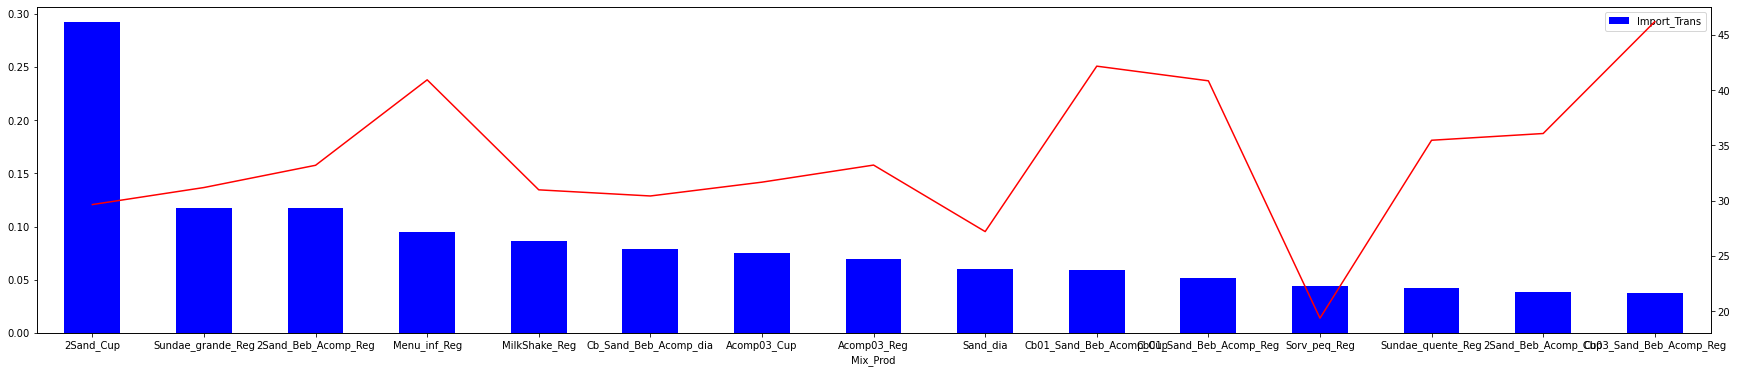

In [36]:
mix15.plot(kind='bar', figsize = (30, 6), x = 'Mix_Prod', y = 'Import_Trans', color = 'b')
mix15['Ticket_Medio'].plot(secondary_y=True, color = 'r')

#### *LEMBRETE*: Avaliar diferenças entre Regiões e propriedade das lojas

Para analisar o perfil do Dataframe em termos de distribuição de Ticket Médio, vamos agora tratar o dataframe de forma que cada linha represente uma transação:

Esse tratamento já será útil para a execução do algoritmo Apriori, onde o perfil das transações deve estar identificado em um código binário 1/0.

Para isso, vamos criar um novo dataframe para fazer as transformações necessárias:

In [37]:
df_transacoes = transacoes

Inicialmente, vamos tratar o dataframe para gerar uma linha para cada transação para gerar a amostragem que será utilizada no modelo:

In [ ]:
transacoes = []
    
for (i, row) in df_transacoes.iterrows():
    if i>10000 and i<10002:
        print(i)
    if i>100000 and i<100002:
        print(i)
    if i>200000 and i<200002:
        print(i)
    if i>500000 and i<500002:
        print(i)
    if i>700000 and i<700002:
        print(i)
    if i>900000 and i<900002:
        print(i)
    with open('log.txt', 'w') as arquivo:
        arquivo.write(str(i))
    transacoes = (transacoes + [row for transacoes in range(row['Qtd_transacoes'])])
    with open('log1.txt', 'w') as arquivo:
        arquivo.write('passei')
df_list_transacoes = pd.DataFrame(transacoes)

10001
100001
200001


In [ ]:
df_list_transacoes.describe()

In [ ]:
df_list_transacoes.head()

In [ ]:
df_list_transacoes = df_list_transacoes.reset_index(drop=True)

In [ ]:
df_list_transacoes.head()

Agora será necessário corrigir os indicadores de GCs, Vendas e Margem dos registros para aplicar o algoritmo de construção de DataFrame aleatório que seja representativo do negócio:

In [ ]:
df_list_transacoes['Venda Unit'] = df_list_transacoes['VL_Venda']/df_list_transacoes['Qtd_transacoes']

In [ ]:
df_list_transacoes['1 transacao'] = df_list_transacoes['Qtd_transacoes']/df_list_transacoes['Qtd_transacoes']

In [ ]:
df_list_transacoes['1 transacao'] = df_list_transacoes['1 transacao'].astype('int64')

In [ ]:
df_list_transacoes['1 transacao'].sum()

In [ ]:
df_list_transacoes['Venda Unit'].sum()

In [ ]:
df_transacoes['Qtd_transacoes'].sum()

In [ ]:
df_transacoes['VL_Venda'].sum()

In [ ]:
df_list_transacoes['VL_Venda'].dtypes

In [ ]:
df_list_transacoes['Qtd_transacoes'].dtypes

In [ ]:
df_list_transacoes['Ticket_Medio'].dtypes

In [ ]:
df_list_transacoes['1 transacao'].dtypes

In [ ]:
del df_list_transacoes['VL_Venda']

In [ ]:
del df_list_transacoes['Qtd_transacoes']

In [ ]:
del df_list_transacoes['Ticket_Medio']

In [ ]:
del df_list_transacoes['1 transacao']

In [ ]:
df_list_transacoes.head()

In [ ]:
#df_list_transacoes = df_list_transacoes.drop(['VL_Venda', 'Qtd_transacoes', 'Ticket_Medio', '1 transacao'],1)

In [ ]:
#df_list_transacoes.head()

Para otimizar a execução futura do código, vamos salvar um CSV parcial com o novo dataframe tratado:

In [ ]:
#df_list_transacoes.to_csv('Lista_Transacoes_BR.csv')

In [ ]:
#df_list_transacoes = pd.read_csv('Lista_Transacoes_BR.csv', delimiter = ',')

In [ ]:
#df_list_transacoes = df_list_transacoes.drop('Unnamed: 0', 1)

In [ ]:
#df_list_transacoes.head()


















+Agora, vamos seguir a Análise Exploratória explorando o perfil das transações da amostra num Histograma:

In [ ]:
df_TM_geral = df_list_transacoes.drop(cols, axis = 1)

In [ ]:
df_TM_geral.head()

In [ ]:
plt.hist(df_TM_geral['Venda Unit'], bins = 100)

#### LEMBRETE: Montar o Histograma geral e histogramas por Admin e Região

## Preparação do Dataframe para a execução do Algoritmo Apriori

Agora vamos aplicar o código para segmentar o meu Dataframe aleatoriamente e rodar algumas verificações para garantir que a base é uma boa representação do total:

In [ ]:
df_sample = df_list_transacoes.sample(frac = 0.20, replace = True, axis = 0)

In [ ]:
df_sample.head()

In [ ]:
TM_sample = df_sample['Venda Unit'].sum()/df_sample['Venda Unit'].count()
print (TM_sample)

In [ ]:
TM = df_list_transacoes['Venda Unit'].sum()/df_list_transacoes['Venda Unit'].count()
print (TM)

In [ ]:
valid_2Sand_sample = df_sample.loc[df_sample['2Sand_Cup'] > 0, ['Venda Unit']].count()/df_sample['Venda Unit'].count()
print (valid_2Sand_sample)

In [ ]:
valid_2Sand = df_list_transacoes.loc[df_list_transacoes['2Sand_Cup'] > 0, ['Venda Unit']].count()/df_list_transacoes['Venda Unit'].count()
print (valid_2Sand)

In [ ]:
TM_2Sand_sample = df_sample.loc[df_sample['2Sand_Cup'] > 0, ['Venda Unit']].sum()/df_sample.loc[df_sample['2Sand_Cup'] > 0, ['Venda Unit']].count()
print (TM_2Sand_sample)

In [ ]:
TM_2Sand = df_list_transacoes.loc[df_list_transacoes['2Sand_Cup'] > 0, ['Venda Unit']].sum()/ df_list_transacoes.loc[df_list_transacoes['2Sand_Cup'] > 0, ['Venda Unit']].count()
print (TM_2Sand)

In [ ]:
valid_Cb01_Reg_sample = df_sample.loc[df_sample['Cb01_Sand_Beb_Acomp_Reg'] > 0, ['Venda Unit']].count()/df_sample['Venda Unit'].count()
print (valid_Cb01_Reg_sample)

In [ ]:
valid_Cb01_Reg = df_list_transacoes.loc[df_list_transacoes['Cb01_Sand_Beb_Acomp_Reg'] > 0, ['Venda Unit']].count()/df_list_transacoes['Venda Unit'].count()
print (valid_Cb01_Reg)

In [ ]:
TM_Cb01_Reg_sample = df_sample.loc[df_sample['Cb01_Sand_Beb_Acomp_Reg'] > 0, ['Venda Unit']].sum()/df_sample.loc[df_sample['Cb01_Sand_Beb_Acomp_Reg'] > 0, ['Venda Unit']].count()
print (TM_Cb01_Reg_sample)

In [ ]:
TM_Cb01_Reg = df_list_transacoes.loc[df_list_transacoes['Cb01_Sand_Beb_Acomp_Reg'] > 0, ['Venda Unit']].sum()/df_list_transacoes.loc[df_list_transacoes['Cb01_Sand_Beb_Acomp_Reg'] > 0, ['Venda Unit']].count()
print (TM_Cb01_Reg)

A amostragem gerou resultados bastante consistente em termos de Ticket Médio geral, incidência de itens relevantes e Ticket Médio de transações contendo estes itens, então entendemos ser adequado continuar a execução do modelo com essa amostragem de 30% do dataframe original.

Agora, com o dataframe ajustado e o número de linhas igual ao total de GCs da base de dados original, é necessário converter os valores maiores do que 1 para a aplicação do modelo:

In [ ]:
df_sample = df_sample.drop(['Venda Unit'], 1)

In [ ]:
df_sample = df_sample.reset_index(drop=True)

In [ ]:
df_sample.head()

In [ ]:
df_sample.shape

In [ ]:
colunas = list(df_sample.columns)
print (colunas)

In [ ]:
del colunas[0]
del colunas[0]
print (colunas)

In [ ]:
df_sample = df_sample[colunas].apply(lambda x: [y if y <= 0 else 1 for y in x])

In [ ]:
df_sample.tail()

Para evitar que linhas zeradas prejudiquem o resultado do modelo, vamos fazer a limpeza do dataframe:

In [ ]:
df_sample["sum"]=df_sample.sum(axis=1)

In [ ]:
df_sample_zeros = df_sample[df_sample['sum']==0]

In [ ]:
df_sample_zeros.shape

In [ ]:
df_sample = df_sample.drop(df_sample_zeros.index, axis = 0)

In [ ]:
df_sample = df_sample.reset_index(drop=True)

In [ ]:
df_sample = df_sample.drop('sum', axis = 1)

In [ ]:
df_sample.shape

Agora podemos aplicar o algoritmo Apriori para avaliar os resultados:

In [ ]:
freq_itemset = apriori(df_sample, min_support=0.02, use_colnames=True)
regras = association_rules(freq_itemset, metric='lift', min_threshold=1)

In [ ]:
regras.sort_values(by='lift', ascending=False)

Dada a elevada importância dentro do negócio, o produto classificado como "2Sand_Cup" concentrou a maioria dos resultados das regras de associação com o suporte mínimo de 0.02, com Lift mais relevante quando combinado com outra promoção "2Sand_Beb_Acomp_Cup", ou apenas do "Acomp_03_Reg" ou "Acomp_03_Cup".

Podemos repetir a execução do algoritmo com um suporte mínimo menor para avaliar que novas combinações surgem:

In [ ]:
freq_itemset1 = apriori(df_sample, min_support=0.01, use_colnames=True)
regras1 = association_rules(freq_itemset1, metric='lift', min_threshold=1)

In [ ]:
regras1.sort_values(by='lift', ascending=False)

Pela Análise Exploratória, constatamos que o grupo "Menu_inf_Reg", que era um dos mais relevantes no negócio, apresentava o maior patamar de Ticket Médio. Podemos executar o algoritmo na sequência para as transações que contam com esse produto, para avaliar que produtos têm maior afinidade com esse item em específico:

In [ ]:
#df_sample_infantil = df_sample[df_sample['Menu_inf_Reg']==1]

In [ ]:
## df_sample_infantil = df_sample_infantil.drop('Menu_inf_Reg', axis = 1)

In [ ]:
#freq_itemset2 = apriori(df_sample_infantil, min_support=0.02, use_colnames=True)
#regras2 = association_rules(freq_itemset2, metric='lift', min_threshold=1)

In [ ]:
#regras2.sort_values(by='lift', ascending=False).head(10)

Agora vamos trabalhar em alguns modelos de visualização destes resultados:

In [ ]:
plt.scatter(regras1['confidence'], regras1['support'], c = regras1['lift'], cmap = 'viridis')
plt.colorbar()
plt.show

Outra possibilidade que podemos avaliar é utilizando outro algoritmo para verificar o resultado gerado. O Frequent Pattern Growth, que é mais eficiente em termos de processamento do que o Apriori:

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

In [ ]:
freq_itemset2 = fpgrowth(df_sample, min_support=0.01, use_colnames = True)

In [ ]:
freq_itemset2.sort_values(by='support', ascending=False)